In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
# Display basic information and the first few rows of each dataset
print("Customers Dataset Info:")

print(customers.info())
print(customers.head())

print("\nProducts Dataset Info:")
print(products.info())
print(products.head())

print("\nTransactions Dataset Info:")
print(transactions.info())
print(transactions.head())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [ ]:
# Check for missing values in each dataset
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print("Customers:")
print(customers.describe(include='all'))
print("Products:")
print(products.describe(include='all'))
print("Transactions:")
print(transactions.describe())


Descriptive Statistics:
Customers:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN             

In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


In [ ]:
# Analyze date columns
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
print("\nSignup Date Range:", customers["SignupDate"].min(), "to", customers["SignupDate"].max())
print("Transaction Date Range:", transactions["TransactionDate"].min(), "to", transactions["TransactionDate"].max())


Signup Date Range: 2022-01-22 00:00:00 to 2024-12-28 00:00:00
Transaction Date Range: 2023-12-30 15:29:12 to 2024-12-28 11:00:00


In [ ]:
# Merge datasets for deeper analysis
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")
merged_data = pd.merge(merged_data, products, on="ProductID", how="left")

print("\nMerged Data Sample:")
print(merged_data.head())


Merged Data Sample:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetoot

In [ ]:
# Top 10 customers with the highest transaction values
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Transaction Value:")
print(top_customers)


Top 10 Customers by Total Transaction Value:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


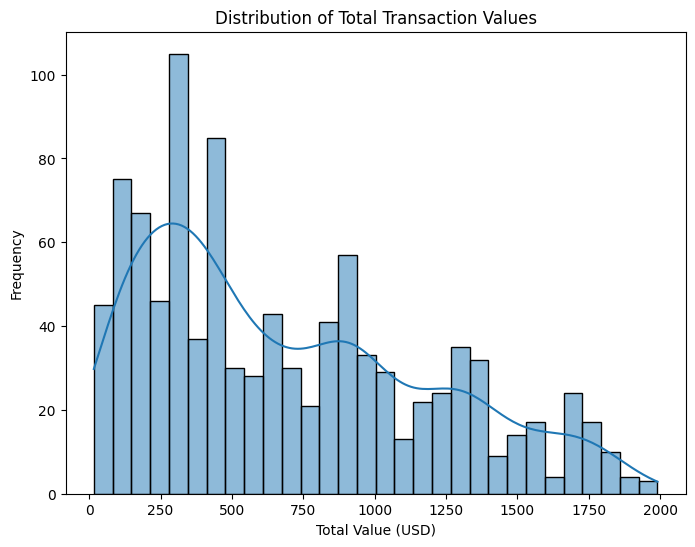

In [ ]:
# Plot the distribution of Total Transaction Values
plt.figure(figsize=(8, 6))
sns.histplot(merged_data["TotalValue"], bins=30, kde=True)
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Value (USD)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Analyze sales by product category
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(category_sales)


Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


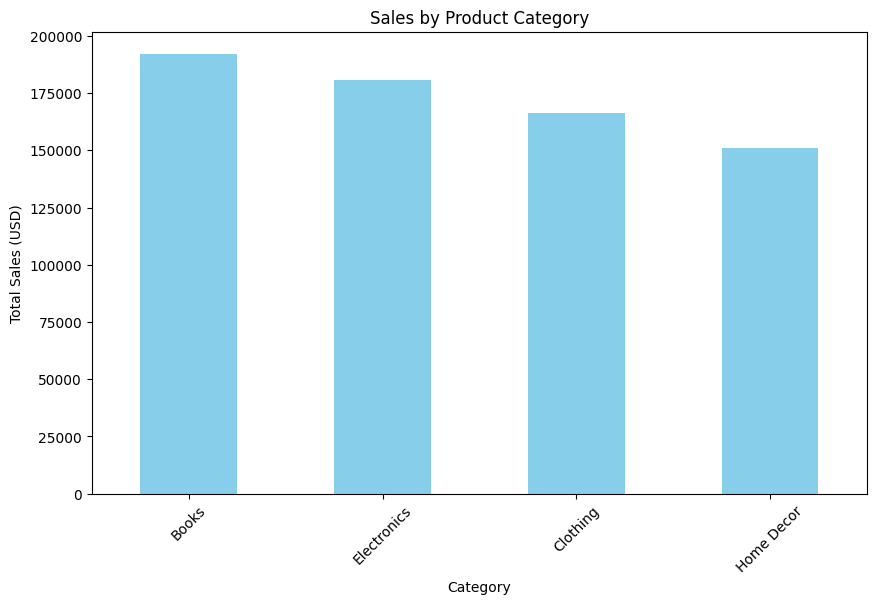

In [ ]:
# Plot sales by product category
plt.figure(figsize=(10, 6))
category_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


Transactions Over Time:
TransactionDate
2023-12-30 15:29:12     313.92
2023-12-31 03:27:43     958.80
2023-12-31 06:53:54    1585.36
2023-12-31 15:44:04     911.44
2024-01-01 03:54:19     147.95
                        ...   
2024-12-26 14:40:03     300.68
2024-12-26 21:34:07     261.20
2024-12-27 17:31:24     294.44
2024-12-27 18:20:31     458.12
2024-12-28 11:00:00     476.79
Name: TotalValue, Length: 1000, dtype: float64


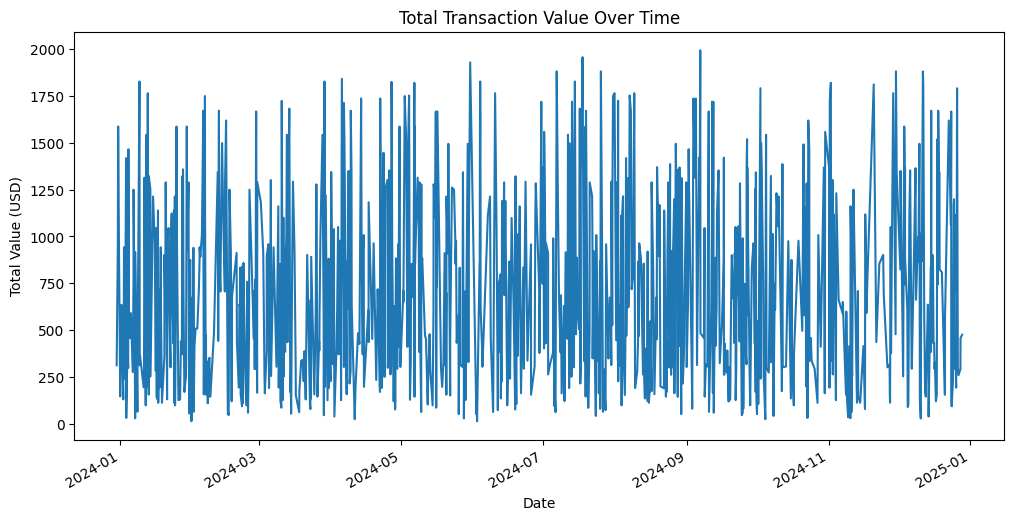

In [ ]:
# Analyze transactions over time
transactions_by_date = merged_data.groupby("TransactionDate")["TotalValue"].sum()
print("\nTransactions Over Time:")
print(transactions_by_date)
plt.figure(figsize=(12, 6))
transactions_by_date.plot()
plt.title("Total Transaction Value Over Time")
plt.xlabel("Date")
plt.ylabel("Total Value (USD)")
plt.show()

In [ ]:
# Regional sales analysis
regional_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("\nSales by Region:")
print(regional_sales)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


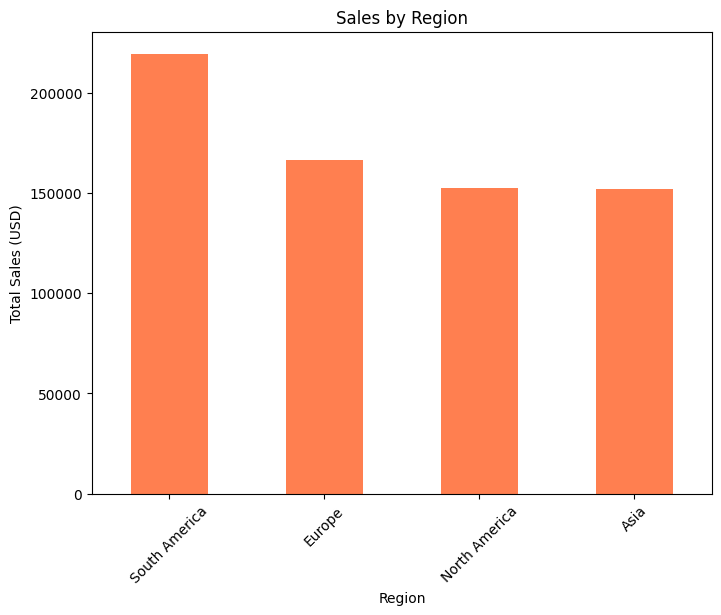

In [ ]:
# Plot regional sales
plt.figure(figsize=(8, 6))
regional_sales.plot(kind="bar", color="coral")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count customers by region
region_customer_count = customers.groupby("Region")["CustomerID"].nunique().sort_values(ascending=False)
print("\nCustomer Count by Region:")
print(region_customer_count)

# Identify the region with the highest number of customers
top_region = region_customer_count.idxmax()
print(f"\nRegion with the highest number of customers: {top_region} ({region_customer_count[top_region]} customers)")



Customer Count by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: CustomerID, dtype: int64

Region with the highest number of customers: South America (59 customers)


In [ ]:
# Analyze the most popular product category
category_popularity = merged_data.groupby("Category")["TransactionID"].count().sort_values(ascending=False)
print("\nProduct Category Popularity (by Number of Transactions):")
print(category_popularity)

# Identify the most popular category
most_popular_category = category_popularity.idxmax()
print(f"\nMost popular product category: {most_popular_category} ({category_popularity[most_popular_category]} transactions)")



Product Category Popularity (by Number of Transactions):
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: TransactionID, dtype: int64

Most popular product category: Books (270 transactions)



Sales by Month and Year:
Year      2023      2024
Month                   
1          NaN  66376.39
2          NaN  51459.27
3          NaN  47828.73
4          NaN  57519.06
5          NaN  64527.74
6          NaN  48771.18
7          NaN  71366.39
8          NaN  63436.74
9          NaN  70603.75
10         NaN  47063.22
11         NaN  38224.37
12     3769.52  59049.20


<Figure size 1200x800 with 0 Axes>

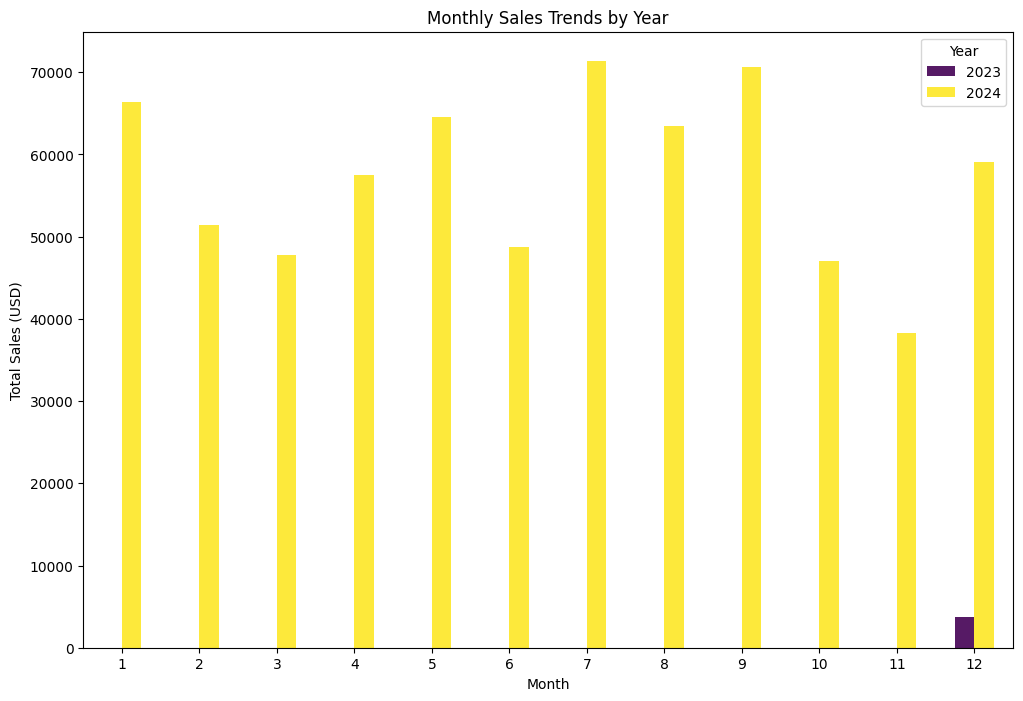

In [ ]:
# Extract year and month from transaction date
merged_data["Year"] = merged_data["TransactionDate"].dt.year
merged_data["Month"] = merged_data["TransactionDate"].dt.month

# Group sales by year and month
sales_by_month_year = merged_data.groupby(["Year", "Month"])["TotalValue"].sum().reset_index()


pivot_sales = sales_by_month_year.pivot(index="Month", columns="Year", values="TotalValue")
print("\nSales by Month and Year:")
print(pivot_sales)

# Plot sales by month and year
plt.figure(figsize=(12, 8))
pivot_sales.plot(kind="bar", figsize=(12, 8), cmap="viridis", alpha=0.9)
plt.title("Monthly Sales Trends by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Year")
plt.xticks(rotation=0)
plt.show()



Average Transaction Value by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64

Region with the highest average transaction value: South America ($721.55)


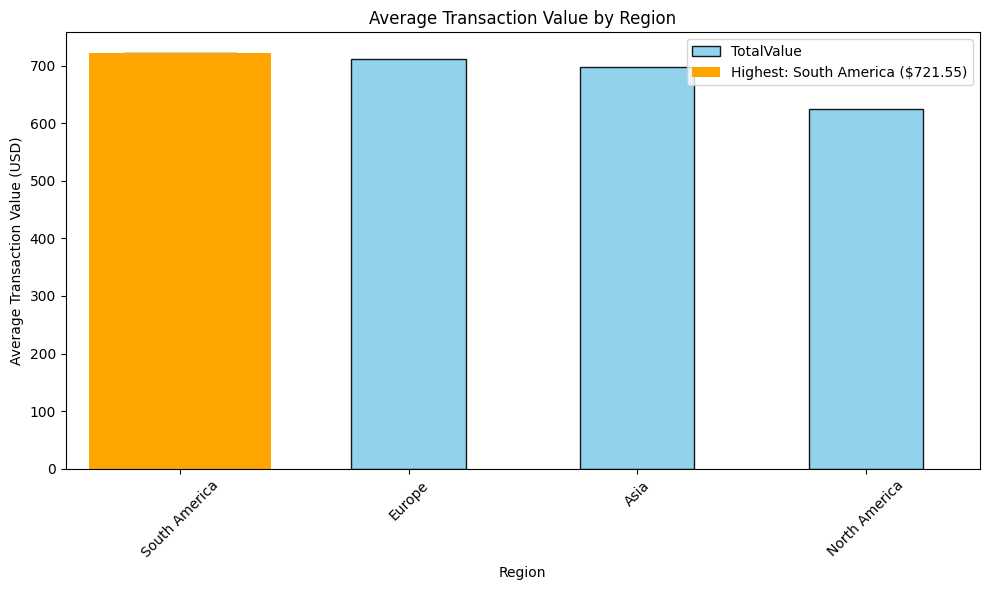

In [ ]:
# Analyze average transaction value by region
region_avg_transaction_value = merged_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
print("\nAverage Transaction Value by Region:")
print(region_avg_transaction_value)

# Identify the region with the highest average transaction value
highest_avg_region = region_avg_transaction_value.idxmax()
print(f"\nRegion with the highest average transaction value: {highest_avg_region} (${region_avg_transaction_value[highest_avg_region]:.2f})")

import matplotlib.pyplot as plt

# Bar chart for average transaction value by region
plt.figure(figsize=(10, 6))
region_avg_transaction_value.plot(
    kind="bar",
    color="skyblue",
    alpha=0.9,
    edgecolor="black"
)
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.xticks(rotation=45)

# Highlight the region with the highest average transaction value
highest_value = region_avg_transaction_value[highest_avg_region]
plt.bar(
    highest_avg_region,
    highest_value,
    color="orange",
    label=f"Highest: {highest_avg_region} (${highest_value:.2f})"
)

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



Sales by Product Category Across Regions:
Region           Asia    Europe  North America  South America
Category                                                     
Books        33119.03  47464.42       41811.99       69752.03
Clothing     49353.09  36335.59       38038.49       42443.49
Electronics  35658.15  41562.60       44716.43       58846.32
Home Decor   33944.70  40892.02       27746.49       48310.72

Top Product Categories for Cross-Region Promotions:
Category
Books          48036.8675
Electronics    45195.8750
Clothing       41542.6650
Home Decor     37723.4825
dtype: float64


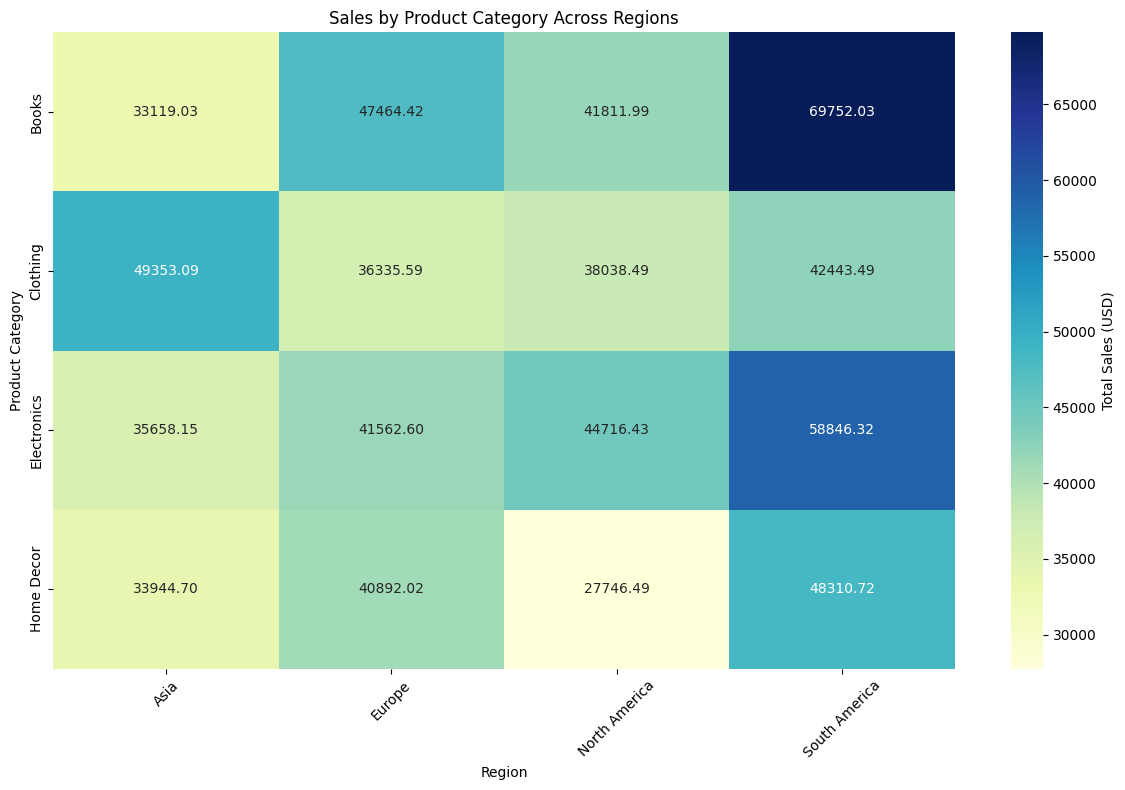

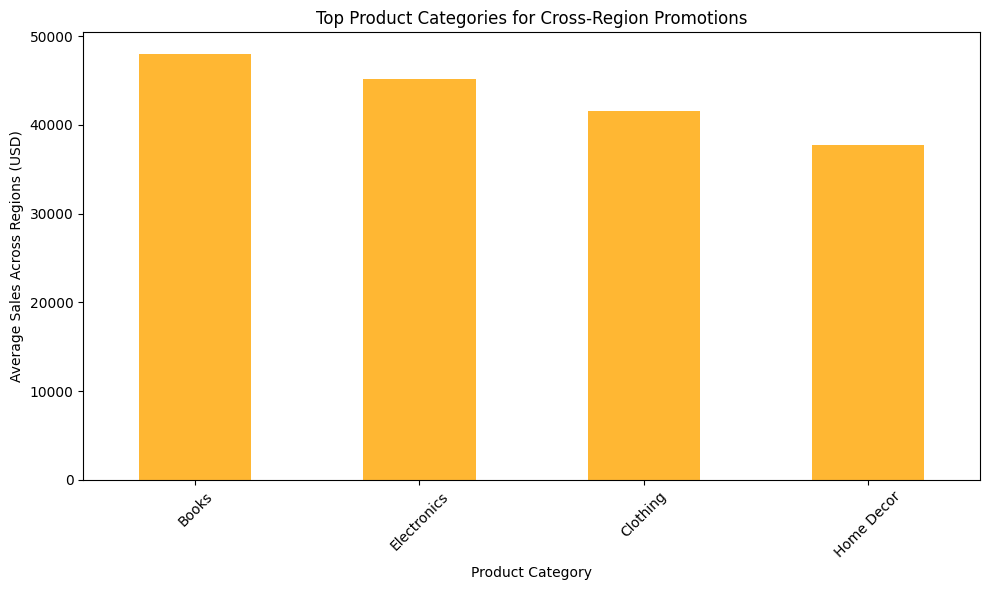

In [ ]:
# Analyze total sales by product category and region
category_region_sales = merged_data.groupby(["Category", "Region"])["TotalValue"].sum().unstack()
print("\nSales by Product Category Across Regions:")
print(category_region_sales)

# Identify product categories with strong cross-region potential
high_potential_categories = category_region_sales.mean(axis=1).sort_values(ascending=False).head()
print("\nTop Product Categories for Cross-Region Promotions:")
print(high_potential_categories)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot a heatmap for category-region sales
plt.figure(figsize=(12, 8))
sns.heatmap(
    category_region_sales,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={"label": "Total Sales (USD)"}
)
plt.title("Sales by Product Category Across Regions")
plt.xlabel("Region")
plt.ylabel("Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for high-potential product categories (average sales across regions)
plt.figure(figsize=(10, 6))
high_potential_categories.plot(
    kind="bar",
    color="orange",
    alpha=0.8
)
plt.title("Top Product Categories for Cross-Region Promotions")
plt.xlabel("Product Category")
plt.ylabel("Average Sales Across Regions (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
